In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from math import * 


print("The current directory is: ")
print(os.getcwd())
if not os.getcwd().endswith("Abaqus-Hardening-Seq-2-Seq-Project"):
    # Move up two directories
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
print("The current directory is: ")
print(os.getcwd())

from utils.IO import *
from utils.calculation import *

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project\notebooks\CP1000_RD_20C
The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from configs.chosen_project import *
from src.stage1_global_configs import *

chosen_project_path = "configs/global_config_CP1000_RD_20C.json"

global_configs = main_global_configs(chosen_project_path)

all_paths = global_configs['all_paths']
objectives = global_configs['objectives']


START RUNNING FROM *** 2024-07-20 15:27:08 ***

= Stage 1: Loading configs and all paths =

Welcome to Abaqus Seq2Seq flow curve calibration project

The configurations you have chosen: 

+--------------------------+------------------------------------------------------------------+
|      Global Configs      |                           User choice                            |
+--------------------------+------------------------------------------------------------------+
|         PROJECT          |                          CP1000_RD_20C                           |
|        OBJECTIVES        |        CHD2, CHD4, NDBR2p5, NDBR6, NDBR15, NDBR40, SH115         |
|       PROJECT_PATH       | c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project |
|    TRAINING_DATA_PATH    |                   training_data/CP1000_RD_20C                    |
|         LOG_PATH         |                        log/CP1000_RD_20C                         |
|       MODELS_PATH        |               

In [4]:
from utils.hardening_laws import *

results_init_common_path = all_paths['results_init_common_path']

true_plastic_strain_config = global_configs['true_plastic_strain_config']

strain_start_end = true_plastic_strain_config["strain_start_end"]

strain_step = true_plastic_strain_config["strain_step"]

true_plastic_strain = calculate_true_plastic_strain(strain_start_end, strain_step, results_init_common_path)

print(f"The true plastic strain len is {len(true_plastic_strain)}")
print(true_plastic_strain)

The true plastic strain len is 100
[0.00e+00 2.00e-04 4.00e-04 6.00e-04 8.00e-04 1.00e-03 2.00e-03 3.00e-03
 4.00e-03 5.00e-03 6.00e-03 7.00e-03 8.00e-03 9.00e-03 1.00e-02 2.00e-02
 3.00e-02 4.00e-02 5.00e-02 6.00e-02 7.00e-02 8.00e-02 9.00e-02 1.00e-01
 1.25e-01 1.50e-01 1.75e-01 2.00e-01 2.25e-01 2.50e-01 2.75e-01 3.00e-01
 3.25e-01 3.50e-01 3.75e-01 4.00e-01 4.25e-01 4.50e-01 4.75e-01 5.00e-01
 5.25e-01 5.50e-01 5.75e-01 6.00e-01 6.25e-01 6.50e-01 6.75e-01 7.00e-01
 7.25e-01 7.50e-01 7.75e-01 8.00e-01 8.25e-01 8.50e-01 8.75e-01 9.00e-01
 9.25e-01 9.50e-01 9.75e-01 1.00e+00 1.05e+00 1.10e+00 1.15e+00 1.20e+00
 1.25e+00 1.30e+00 1.35e+00 1.40e+00 1.45e+00 1.50e+00 1.55e+00 1.60e+00
 1.65e+00 1.70e+00 1.75e+00 1.80e+00 1.85e+00 1.90e+00 1.95e+00 2.00e+00
 2.05e+00 2.10e+00 2.15e+00 2.20e+00 2.25e+00 2.30e+00 2.35e+00 2.40e+00
 2.45e+00 2.50e+00 2.55e+00 2.60e+00 2.65e+00 2.70e+00 2.75e+00 2.80e+00
 2.85e+00 2.90e+00 2.95e+00 3.00e+00]


In [5]:
from utils.sampling import *

initial_sim_config = global_configs['initial_sim_config']
num_samples = initial_sim_config['num_samples']
sampling_method = initial_sim_config['sampling_method']
param_config = global_configs['param_config']

print(param_config)
initial_sampled_params = sampling(param_config, num_samples, sampling_method)

print(f"The sampled params are {initial_sampled_params}")

{'c1': {'lower': 0.1, 'upper': 0.3, 'iter_max_range': 0.016, 'exponent': 1.0, 'name': 'W', 'unit': 'dimensionless'}, 'c2': {'lower': 1.0, 'upper': 1.4, 'iter_max_range': 0.032, 'exponent': 1000000000.0, 'name': 'K', 'unit': 'Pa'}, 'c3': {'lower': 0.3, 'upper': 0.7, 'iter_max_range': 0.032, 'exponent': 0.0001, 'name': 'PEEQ_0', 'unit': 'dimensionless'}, 'c4': {'lower': 0.01, 'upper': 0.3, 'iter_max_range': 0.024, 'exponent': 1.0, 'name': 'n', 'unit': 'dimensionless'}, 'c5': {'lower': 0.8, 'upper': 1.1, 'iter_max_range': 0.024, 'exponent': 1000000000.0, 'name': 'sigma_y', 'unit': 'Pa'}, 'c6': {'lower': 0.01, 'upper': 0.3, 'iter_max_range': 0.024, 'exponent': 1000000000.0, 'name': 'sigma_sat', 'unit': 'Pa'}, 'c7': {'lower': 0.3, 'upper': 0.7, 'iter_max_range': 0.032, 'exponent': 100.0, 'name': 'b', 'unit': 'dimensionless'}}
The sampled params are [{'c1': 0.27011709343642, 'c2': 1372546401.9924402, 'c3': 4.450870361179113e-05, 'c4': 0.1157195464707911, 'c5': 841983640.100807, 'c6': 1726037

In [6]:
from utils.hardening_laws import *

hardening_law = true_plastic_strain_config["hardening_law"]
extrapolate_N_first_strain_values = true_plastic_strain_config["extrapolate_N_first_strain_values"]

generated_true_stress = []

for i in range(num_samples):
    parameters = initial_sampled_params[i]
    true_stress = calculate_true_stress(parameters, hardening_law, 
                                                        true_plastic_strain,
                                                        extrapolate_N_first_strain_values)
    # assert that the true_stress is monotonically increasing
    for j in range(1, len(true_stress)):
        assert true_stress[j] >= true_stress[j-1]
    generated_true_stress.append(true_stress)


generated_diff_true_stress = []

for i in range(num_samples):
    generated_diff_true_stress.append(np.diff(generated_true_stress[i]))

### Plotting the flow curves (true stress vs true strain)

In [7]:
### Extracting the referenced flow curve

# import the interp1d
from scipy.interpolate import interp1d

targets_path = all_paths['targets_path']
flow_curve_exists = False
if os.path.exists(f"{targets_path}/referenced_flow_curve_original.csv"):
    referenced_flow_curve = pd.read_csv(f"{targets_path}/referenced_flow_curve_original.csv")
    referenced_stress_Pa = referenced_flow_curve['stress/Pa']
    referenced_strain = referenced_flow_curve['strain/-']
    f = interp1d(referenced_strain, referenced_stress_Pa, kind='linear', fill_value="extrapolate")
    interpolated_referenced_stress_Pa = f(true_plastic_strain)
    interpolated_diff_referenced_stress_Pa = np.diff(interpolated_referenced_stress_Pa)
    flow_curve_exists = True

### You can tweak the parameters' upper and lower bounds and exponent values in the global_config_{project} file and click Run All to check until the generated true stress-true plastic strain curves cover the referenced flow curves (assume you derive the referenced flow curve based on tensile test of the smooth dog bone specimen)

### For CP1000, the parameters fitted by Wu Jiaojiao is

- W = 0.2
- K = 1254 MPa
- PEEQ_0 = 5.13e-5
- n = 0.051
- sigma_y = 922.8 MPa
- sigma_sat = 162 MPa
- beta = 52.86

The lowest RMSE is 12915451.949479716 Pa
The highest RMSE is 261024312.23387593 Pa


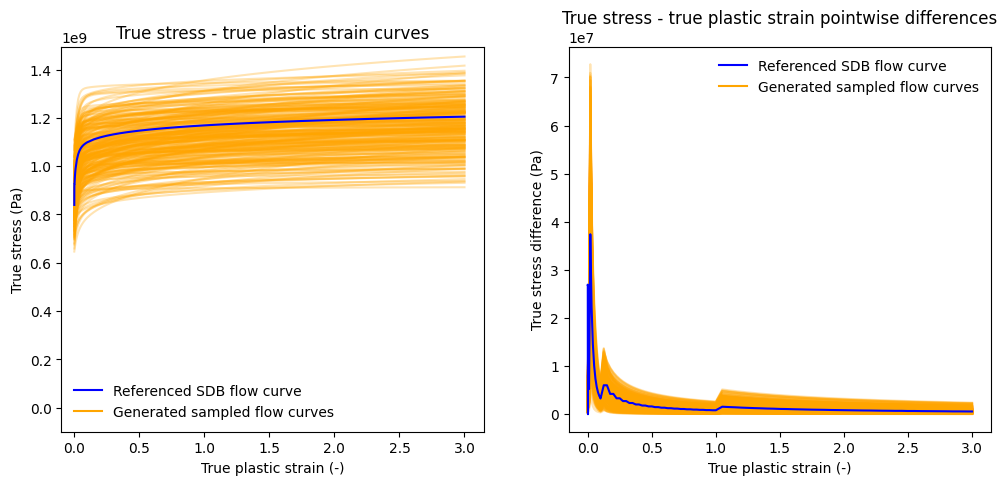

In [8]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(12, 5))

lowest_RMSE = np.inf
highest_RMSE = -np.inf

for i in range(num_samples):
    ax[0].plot(true_plastic_strain, generated_true_stress[i], color="orange", alpha=0.3)
    ax[1].plot(true_plastic_strain[1:], generated_diff_true_stress[i], color="orange", alpha=0.3)
    if flow_curve_exists:
        if lowest_RMSE > np.sqrt(np.mean((generated_true_stress[i] - interpolated_referenced_stress_Pa)**2)):
            lowest_RMSE = np.sqrt(np.mean((generated_true_stress[i] - interpolated_referenced_stress_Pa)**2))
        if highest_RMSE < np.sqrt(np.mean((generated_true_stress[i] - interpolated_referenced_stress_Pa)**2)):
            highest_RMSE = np.sqrt(np.mean((generated_true_stress[i] - interpolated_referenced_stress_Pa)**2))
    
if flow_curve_exists:
    ax[0].plot(true_plastic_strain, interpolated_referenced_stress_Pa, color="blue", label="Referenced SDB flow curve")
    ax[1].plot(true_plastic_strain[1:], interpolated_diff_referenced_stress_Pa, color="blue", label="Referenced SDB flow curve")

ax[0].plot([], [], color="orange", label="Generated sampled flow curves")
ax[0].set_xlabel('True plastic strain (-)')
ax[0].set_ylabel('True stress (Pa)')
ax[0].set_xlim(left=-0.1)
ax[0].set_ylim(bottom=-1e8)
ax[0].set_title('True stress - true plastic strain curves')
ax[0].legend(frameon=False)

ax[1].plot([], [], color="orange", label="Generated sampled flow curves")
ax[1].set_xlabel('True plastic strain (-)')
ax[1].set_ylabel('True stress difference (Pa)')
ax[1].set_title('True stress - true plastic strain pointwise differences')
ax[1].legend(frameon=False)

print(f"The lowest RMSE is {lowest_RMSE} Pa")
print(f"The highest RMSE is {highest_RMSE} Pa")

### Saving the initial_sampled_parameters, true_plastic_strain and true_stress values as npy file

In [9]:
results_init_common_path = all_paths['results_init_common_path']
np.save(f"{results_init_common_path}/true_plastic_strain.npy", true_plastic_strain)
np.save(f"{results_init_common_path}/initial_sampled_true_stress.npy", generated_true_stress)
np.save(f"{results_init_common_path}/initial_sampled_parameters.npy", initial_sampled_params)

### We combine interpolated referenced stress and true plastic strain into a pd dataframe

if flow_curve_exists:
    referenced_flow_curve_df = pd.DataFrame({"strain/-": true_plastic_strain, 
                                             "stress/MPa": interpolated_referenced_stress_Pa * 1000, 
                                             "stress/Pa": interpolated_referenced_stress_Pa})
    referenced_flow_curve_df.to_csv(f"{targets_path}/referenced_flow_curve.csv", index=False)

### Testing the inverse engineering of hardening parameters using the true_stress and true_plastic_strain values

Original parameters
{'c1': 0.12302439790219069, 'c2': 1181458855.420351, 'c3': 5.6963391229510305e-05, 'c4': 0.24920265035703779, 'c5': 1037449742.7605093, 'c6': 36801275.12663603, 'c7': 67.46548220515251}
Inversed calculated parameters
{'c1': 0.12436268436978966, 'c2': 1156132041.632706, 'c3': 7e-05, 'c4': 0.24364605991955313, 'c5': 1042708301.3723419, 'c6': 34935432.14736451, 'c7': 51.213838550635415}
The RMSE is 1184504.3547619686


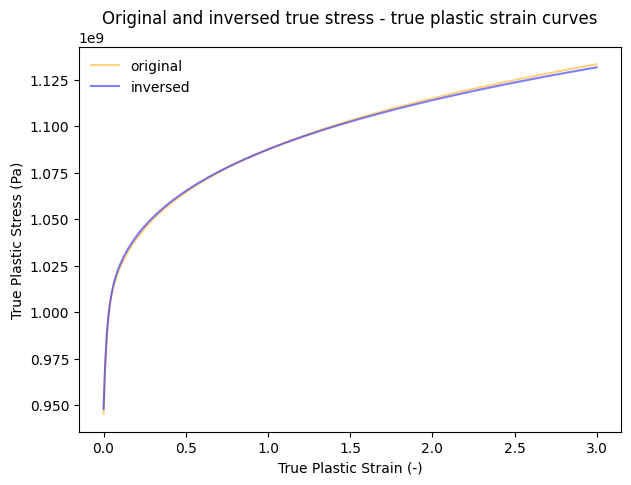

In [10]:
plt.figure(figsize=(7, 5))
index = 1 # test within the range of num_samples

from utils.hardening_laws import calculate_inverse_hardening_law_parameters
from utils.hardening_laws import calculate_true_stress

print("Original parameters")
print(initial_sampled_params[index])

print("Inversed calculated parameters") 
true_stress = generated_true_stress[index]
inverse_params, lowest_RMSE = calculate_inverse_hardening_law_parameters(true_plastic_strain, true_stress, 
                                                            hardening_law, param_config, RMSE_threshold=1,
                                                            extrapolate_N_first_strain_values=extrapolate_N_first_strain_values)
print(inverse_params)
plt.plot(true_plastic_strain, generated_true_stress[index], color="orange", alpha=0.5, label="original")
inversed_true_stress = calculate_true_stress(inverse_params, hardening_law,
                                                            true_plastic_strain,
                                                            extrapolate_N_first_strain_values=extrapolate_N_first_strain_values)

RMSE = np.sqrt(np.mean((np.array(generated_true_stress[index]) - np.array(inversed_true_stress))**2))

print(f"The RMSE is {RMSE}")
plt.plot(true_plastic_strain, inversed_true_stress, color="blue", alpha=0.5, label="inversed")
plt.xlabel('True Plastic Strain (-)')
plt.ylabel('True Plastic Stress (Pa)')
plt.legend(frameon=False)
plt.title('Original and inversed true stress - true plastic strain curves')
plt.show()

### Inverse calibrated parameters for referenced flow curve

Original parameters
{'c1': 0.12302439790219069, 'c2': 1181458855.420351, 'c3': 5.6963391229510305e-05, 'c4': 0.24920265035703779, 'c5': 1037449742.7605093, 'c6': 36801275.12663603, 'c7': 67.46548220515251}
Inversed calculated parameters
{'c1': 0.2742480509796367, 'c2': 1330126742.562361, 'c3': 5.536524692979717e-05, 'c4': 0.09235839812527567, 'c5': 948416702.3084253, 'c6': 156839976.47022852, 'c7': 63.173888298477806}
The RMSE is 9255587.760153703


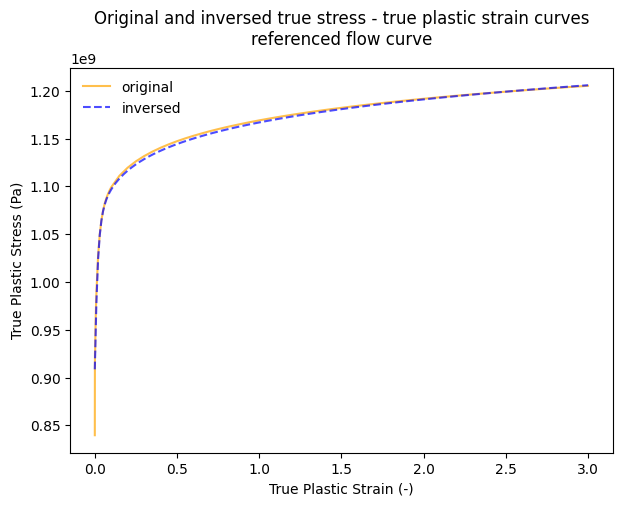

In [12]:
plt.figure(figsize=(7, 5))
index = 1 # test within the range of num_samples

from utils.hardening_laws import calculate_inverse_hardening_law_parameters
from utils.hardening_laws import calculate_true_stress

print("Original parameters")
print(initial_sampled_params[index])

print("Inversed calculated parameters") 

param_config_loose_bounds = global_configs['param_config']

inverse_params, lowest_RMSE = calculate_inverse_hardening_law_parameters(true_plastic_strain, interpolated_referenced_stress_Pa, 
                                                            hardening_law, param_config, RMSE_threshold=1,
                                                            extrapolate_N_first_strain_values=extrapolate_N_first_strain_values)
print(inverse_params)
plt.plot(true_plastic_strain, interpolated_referenced_stress_Pa, color="orange", alpha=0.7, label="original")
inversed_true_stress = calculate_true_stress(inverse_params, hardening_law,
                                                            true_plastic_strain,
                                                            extrapolate_N_first_strain_values=extrapolate_N_first_strain_values)

RMSE = np.sqrt(np.mean((np.array(interpolated_referenced_stress_Pa) - np.array(inversed_true_stress))**2))

print(f"The RMSE is {RMSE}")
plt.plot(true_plastic_strain, inversed_true_stress, color="blue", alpha=0.7, label="inversed", linestyle="--")
plt.xlabel('True Plastic Strain (-)')
plt.ylabel('True Plastic Stress (Pa)')
plt.legend(frameon=False)
plt.title('Original and inversed true stress - true plastic strain curves\nreferenced flow curve')
plt.show()

In [ ]:
# Test the performance of inverse fitting
# This cell can run for a while since the RMSE requirement is very strict (RMSE < 1)

# RMSE_list = []
# for index in range(num_samples):
#     print(index)
#     true_stress = generated_true_stress[index]
#     inverse_params, lowest_RMSE = calculate_inverse_hardening_law_parameters(true_plastic_strain, true_stress, 
#                                                                 hardening_law, param_config, RMSE_threshold=1,
#                                                                 extrapolate_N_first_strain_values=extrapolate_N_first_strain_values)

#     inversed_true_stress = calculate_true_stress(inverse_params, hardening_law,
#                                                                 true_plastic_strain,
#                                                                 extrapolate_N_first_strain_values=extrapolate_N_first_strain_values)

#     RMSE = np.sqrt(np.mean((np.array(generated_true_stress[index]) - np.array(inversed_true_stress))**2))
#     if RMSE > 1:
#         print(f"(Warning) The RMSE is {RMSE} for index {index}")
#     RMSE_list.append(RMSE)

# print(f"The average RMSE of inverse fitting is {np.mean(RMSE_list)}")